<a href="https://colab.research.google.com/github/Xiuyu0223/109-1_Algorithm_S10755042/blob/master/%E4%BE%AF%E7%A7%80%E7%91%9C_109%E6%BC%94%E7%AE%97%E6%B3%95%E6%9C%9F%E6%9C%AB%E8%80%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**109演算法期末考**

*   每題25分共125分
*   1/13 23:59前完成不扣分;
*   11/14 11:59前減5分;11/14 23:59前減10分；1/15 11:59前減15分;
*   最遲需於1/15 11:59前繳交!
*   請在解題想法區塊寫上解題的想法/思路、所使用的演算法及其原因(最好有推導過程)
*   程式碼需可以執行，且依照題目說明的輸入輸出規範
*   檔名改成 XXX_109演算法期末考.ipynb







第一題：
請從一個整數Array中，找出第K大的元素

Exp：輸入: {5,3,8,2,9,4,6} 
          K=2
    輸出: Ans:8


解題想法：讓使用者輸入一個以空白鍵隔開的數列字串，用split把數字分開成陣列的元素，並將其型態由str轉換為int以便排序。使用sorted()函式直接對資料做排序(我這邊最後排序完的是陣列a)，最後印出排序好的陣列及第K大的數值給使用者看。

In [4]:
#程式#第一題
num_arr = []
int_num_arr = []
K = 0
while(len(num_arr)<6):
  numbers=input("請輸入一串數字(需六個以上，請以空白鍵隔開)：")
  num_arr = numbers.split()
K = int(input("請輸入要搜尋第K大的數值，K = "))
while(K>len(num_arr)):
  K = int(input("請輸入要搜尋第K大的數值，K = "))
for i in range(0, len(num_arr)):
  int_num_arr.append(int(num_arr[i]))
a = sorted(int_num_arr, reverse=True)
print("你輸入的數字是：{", end="")
for n in range(0, len(a)):
  if(n==len(a)-1):
    print(a[n],end="")
  else:
    print(a[n],end=",")
print("}")
print("K=", K, "ANS:", a[K-1])

請輸入一串數字(需六個以上，請以空白鍵隔開)：324 12 21 56 8 90 76 42 24 31 16 8
請輸入要搜尋第K大的數值，K = 5
你輸入的數字是：{324,90,76,56,42,31,24,21,16,12,8,8}
K= 5 ANS: 42


第二題： 找零錢問題
目前有 1,2,5,10 四種面值的硬幣，請算出有總共有幾種方式湊N元?


Exp：輸入N=32，輸出：各種湊出32元的組合



解題想法：原本是想要沿用之前作業找零錢問題的程式碼，

因為之前是為了找最少硬幣數而撰寫的程式碼，因此我想說在每一次找零錢的過程中會把所有可能性都跑過一遍，可以將此程式修改為show出N元找零錢的所有可能性。

但後來修改時發現好像沒辦法直接這樣去做，所以最後還是考慮窮舉法，但還是找不到適合的算法去把所有可能性列舉出來。加上實際上用手算，真的算不太出來，可能性有點太多種了，算不完QQ

In [42]:
#程式#第二題
#自己重新嘗試看看有沒有辦法用程式跑窮舉法，但沒有嘗試出如何設計成舉出所有硬幣組合的結果
def rec_change(t,n):
  s = 0 #記錄每次找零的面額
  allpossibilities = []
  possibility = []
  
  for money in range(n+1,1,-1):
      for coin in reversed(t):
        while money - coin >= 0:
          money-=coin
          possibility.append(coin)
          rec_change(t, money-coin)

      if(possibility not in allpossibilities):
        allpossibilities.append(possibility)
        possibility = []

  return allpossibilities

# n = 多少錢
def change(t,n):
  allpossibilities = rec_change(t, n)
  for p in allpossibilities:
    print(p)

# t = 面額
t = [1, 2, 5, 10]


print("-----計算結果-----")
rec_change(t,12)


-----計算結果-----


[[10, 2, 1],
 [10, 2],
 [10, 1],
 [10],
 [5, 2, 2],
 [5, 2, 1],
 [5, 2],
 [5, 1],
 [5],
 [2, 2],
 [2, 1],
 [2]]

In [35]:
#另一個方法，嘗試看看有沒有辦法用程式跑窮舉法，但結果有點奇怪QQ，沒有嘗試出如何設計成舉出所有硬幣組合的結果
import math
total=32
money=[1,2,5,10]
results=[]
for i in range(int(total/money[0])+1):
    result=[i]
    for ii in range(int(total/money[1])+1):
        result = [ii]
        for iii in range(int(total / money[2]) + 1):
            result = [iii]
            for iiii in range(int(total / money[3]) + 1):
                result = [iiii]
                if i*money[0]+ii*money[1]+iii*money[2]+iiii*money[3]==total:
                  result.append(i)
                  result.append(ii)
                  result.append(iii)
                  result.append(iiii)
                 
                  results.append(result[1:4])
print(results)

[[0, 1, 0], [0, 1, 2], [0, 1, 4], [0, 1, 6], [0, 6, 0], [0, 6, 2], [0, 6, 4], [0, 11, 0], [0, 11, 2], [0, 16, 0], [1, 3, 1], [1, 3, 3], [1, 3, 5], [1, 8, 1], [1, 8, 3], [1, 13, 1], [2, 0, 0], [2, 0, 2], [2, 0, 4], [2, 0, 6], [2, 5, 0], [2, 5, 2], [2, 5, 4], [2, 10, 0], [2, 10, 2], [2, 15, 0], [3, 2, 1], [3, 2, 3], [3, 2, 5], [3, 7, 1], [3, 7, 3], [3, 12, 1], [4, 4, 0], [4, 4, 2], [4, 4, 4], [4, 9, 0], [4, 9, 2], [4, 14, 0], [5, 1, 1], [5, 1, 3], [5, 1, 5], [5, 6, 1], [5, 6, 3], [5, 11, 1], [6, 3, 0], [6, 3, 2], [6, 3, 4], [6, 8, 0], [6, 8, 2], [6, 13, 0], [7, 0, 1], [7, 0, 3], [7, 0, 5], [7, 5, 1], [7, 5, 3], [7, 10, 1], [8, 2, 0], [8, 2, 2], [8, 2, 4], [8, 7, 0], [8, 7, 2], [8, 12, 0], [9, 4, 1], [9, 4, 3], [9, 9, 1], [10, 1, 0], [10, 1, 2], [10, 1, 4], [10, 6, 0], [10, 6, 2], [10, 11, 0], [11, 3, 1], [11, 3, 3], [11, 8, 1], [12, 0, 0], [12, 0, 2], [12, 0, 4], [12, 5, 0], [12, 5, 2], [12, 10, 0], [13, 2, 1], [13, 2, 3], [13, 7, 1], [14, 4, 0], [14, 4, 2], [14, 9, 0], [15, 1, 1], [15, 

第三題： 有個小偷到3C用品店偷東⻄,假設他的背包的負重最多可達10公斤,他希望在背包中裝入負重範圍內可得之總價物品,小偷的背包應該怎麼裝才能帶走最有價值的商品?

* 每個商品只有拿走/留著這兩種狀況
* 每個商品不能被切割（如拿1/3個）
* 每個商品也不能被拿超過一次
* 請輸出所選擇的產品之編號，單價，總價，背包總重量


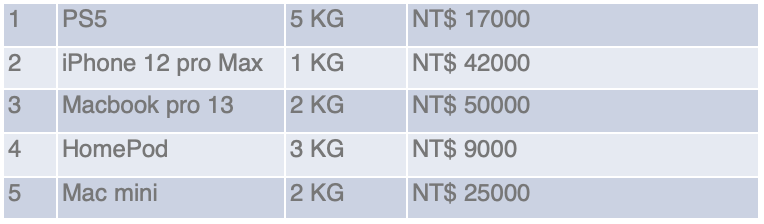








解題想法：將使用者輸入的重量跟價值分別存成兩個陣列，並將物品的重量跟價值相除換算成一個數值做比較，選出最大重量內可以得到的最大價值的物品是哪些，用1和0來代表取走和未取走的兩種狀態。最後把被取走的物品(fraction為1)的編號及單價、總價、總重分別印出給使用者看。

In [22]:
#程式#第三題
def fractional_knapsack(value, weight, capacity):
    """Return maximum value of items and their fractional amounts.
 
    (max_value, fractions) is returned where max_value is the maximum value of
    items with total weight not more than capacity.
    fractions is a list where fractions[i] is the fraction that should be taken
    of item i, where 0 <= i < total number of items.
 
    value[i] is the value of item i and weight[i] is the weight of item i
    for 0 <= i < n where n is the number of items.
 
    capacity is the maximum weight.
    """
    
    index = list(range(len(value))) 
    ratio = [v/w for v, w in zip(value, weight)] #將價值v與重量w相除，後續透過這個數值來比較
    index.sort(key=lambda i: ratio[i], reverse=True) #將物品按照比率(價值比)從高排到低
 
    max_value = 0                  #用max_value這個變數來儲存最大可以取得的價值是多少
    fractions = [0]*len(value)            #從陣列中第0個開始乘它的價值
    for i in index:
        if weight[i] <= capacity:       #如果第i個位置上的物品重量小於等於剩餘的容量值
            fractions[i] = 1        #則將fractions數值設為1，代表取走
            max_value += value[i]      #此時把物品裝入背包，故要將此物品價值加上去
            capacity -= weight[i]     #所剩的容量就等於最大容量減掉放入背包中的物品重量
        else:           #如果第i個位置上物品重量比剩餘的容量值大
            fractions[i] = capacity/weight[i]   #把將fractions數值設為0，代表沒有取走
            #max_value += value[i]*capacity/weight[i]
            break
 
    return max_value, fractions
 
 
n = int(input('請輸入物品數量: '))
value = input('請依序輸入這{}個物品的價值: '.format(n)).split()
while (len(value)<n):
  value = input('請依序輸入這{}個物品的價值: '.format(n)).split()
value = [int(v) for v in value]


weight = input('請依序輸入這{}個物品的重量: '.format(n)).split()
while (len(weight)!=len(value)):
  weight = input('請依序輸入這{}個物品的重量: '.format(n)).split()
weight = [int(w) for w in weight]

capacity = int(input('輸入可裝的最大重量: '))
 
max_value, fractions = fractional_knapsack(value, weight, capacity)

weightSum=0

print("計算結果......")
print('物品會被拿走的情況是(1代表拿走；0代表未取走:', fractions)
print('會被取走的物品如下:')
for i in range(len(value)):
  if fractions[i]==1:
    weightSum+=weight[i]
    print("編號",i+1,"單價",value[i])
print("這些物品的總價為", max_value)
print("最終背包總重為", weightSum)


請輸入物品數量: 5
請依序輸入這5個物品的價值: 17000 42000 50000 9000 25000
請依序輸入這5個物品的重量: 5 1 2 3 2
輸入可裝的最大重量: 10
計算結果......
物品會被拿走的情況是(1代表拿走；0代表未取走: [1, 1, 1, 0.0, 1]
會被取走的物品如下:
編號 1 單價 17000
編號 2 單價 42000
編號 3 單價 50000
編號 5 單價 25000
這些物品的總價為 134000
最終背包總重為 10


第四題：請以深度優先搜尋(DFS)、廣度優先搜尋法(BFS)走訪有向圖中的所有節點，並印出兩種搜尋法的走訪順序

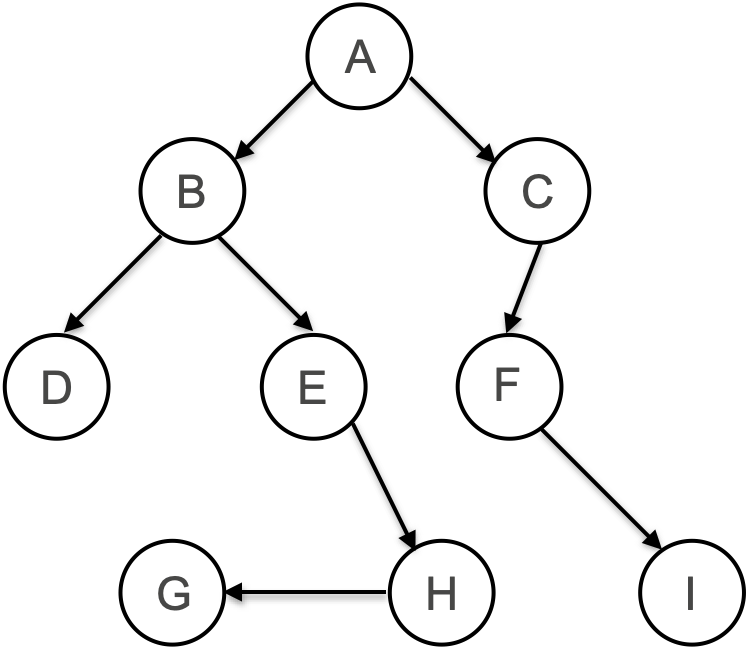

解題想法：從A點開始，使用深度優先搜尋法去遍歷整張圖，會先把目前節點(B)以下的所有節點(D,E,H,G)都找完，才會再前往同一層的下個節點(C)；若使用的是廣度優先搜尋法來遍歷這張圖，則從A點開始後，會先將同一層的所有節點都搜尋過一次(B,C)，才會前往下一層(D,E,F)繼續搜尋。

In [ ]:
#程式#第四題
def enqueue(a, o):
    a.insert(0, o)

def dequeue(a):
    return a.pop()

g = { #  graph: 被搜尋的網路
    'A': {'n':['B','C'], 'v':0}, #  n: neighbor (鄰居), v: visited (是否被訪問過)
    'B': {'n':['D','E'], 'v':0},
    'C': {'n':['F'], 'v':0},
    'D': {'n':[], 'v':0},
    'E': {'n':['H'], 'v':0},
    'F': {'n':['I'], 'v':0},
    'G': {'n':[], 'v':0},
    'H': {'n':['G'], 'v':0},
    'I': {'n':[], 'v':0}
}

def init(g): #  初始化、設定 visited 為 0
    for i in g:
        g[i]['v'] = 0

def dfs(g, node): #  深度優先搜尋
    if g[node]['v']!=0:           #已訪問過的節點，就不再訪問了
        return
    print(node, '=> ', end = '')  #  若未訪問過則將結點印出來
    g[node]['v'] = 1              # 並且將這個節點設定為已訪問
    neighbors = g[node]['n']      # 取出鄰居節點
    for n in neighbors:           #  對於每個鄰居
        dfs(g, n)                 #  逐一進行訪問

queue=['A'] # BFS用的queue,將起始點設為A。

def bfs(g, q): #  廣度優先搜尋
    if len(q)==0:                 #  如果 queue 已空，則返回。
        return
    node = dequeue(q)             #  否則將 queue 的第一個節點取出。
    if g[node]['v'] == 0:         #  若該節點尚未拜訪過。
        g[node]['v'] = 1          #  則將該節點標示為已拜訪
    else:                         #  否則 (代表已訪問過)
        return                    #    就直接返回不再搜尋
    print(node, '=> ', end = '')  #  把現在拜訪的這個節點印出來
    neighbors = g[node]['n']      #  接下來把鄰居節點取出來
    for n in neighbors: #  循序取每個鄰居
        if not g[n]['v']:         #  假如目前的鄰居還沒被拜訪過
            enqueue(q, n)         #    就將其放入 queue
    bfs(g, q)

print('深度優先搜尋 dfs:', end = '')
init(g)
dfs(g, 'A') # 呼叫深度優先搜尋。
print('結束')

print('廣度優先搜尋 bfs:', end = '')
init(g)
bfs(g, queue) # 呼叫廣度優先搜尋。
print('結束')


深度優先搜尋 dfs:A => B => D => E => H => G => C => F => I => 結束
廣度優先搜尋 bfs:A => B => C => D => E => F => H => I => G => 結束


第五題： 請用 Kruskal或Prim 演算法(2選1)找出下圖的最小生成樹，並依照順序寫出加入的每一個邊

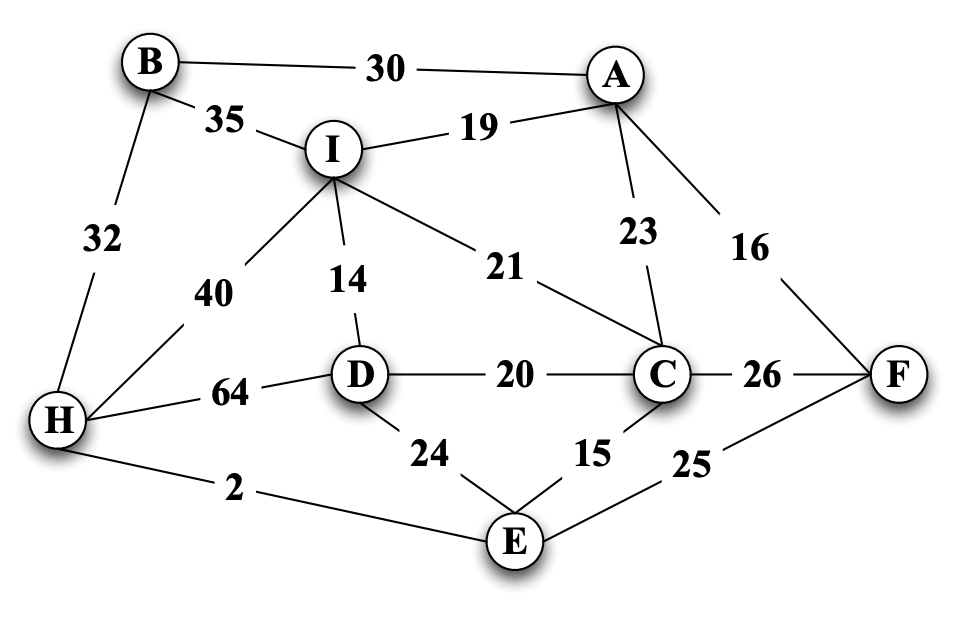

解題想法：用Kruskal演算法來寫出最小生成樹依序所需要的邊。把A,B,C,D,E,F,H,I共八個節點之間有連通的點跟點之間的邊長存進矩陣，以供後續找尋最小邊。其中最小邊被選擇後應該連接到還沒有被連結到的節點上，且不會形成迴圈，就可以選擇該節點，直到選到n-1條邊時即可。

最小生成樹的結果如下圖所示：

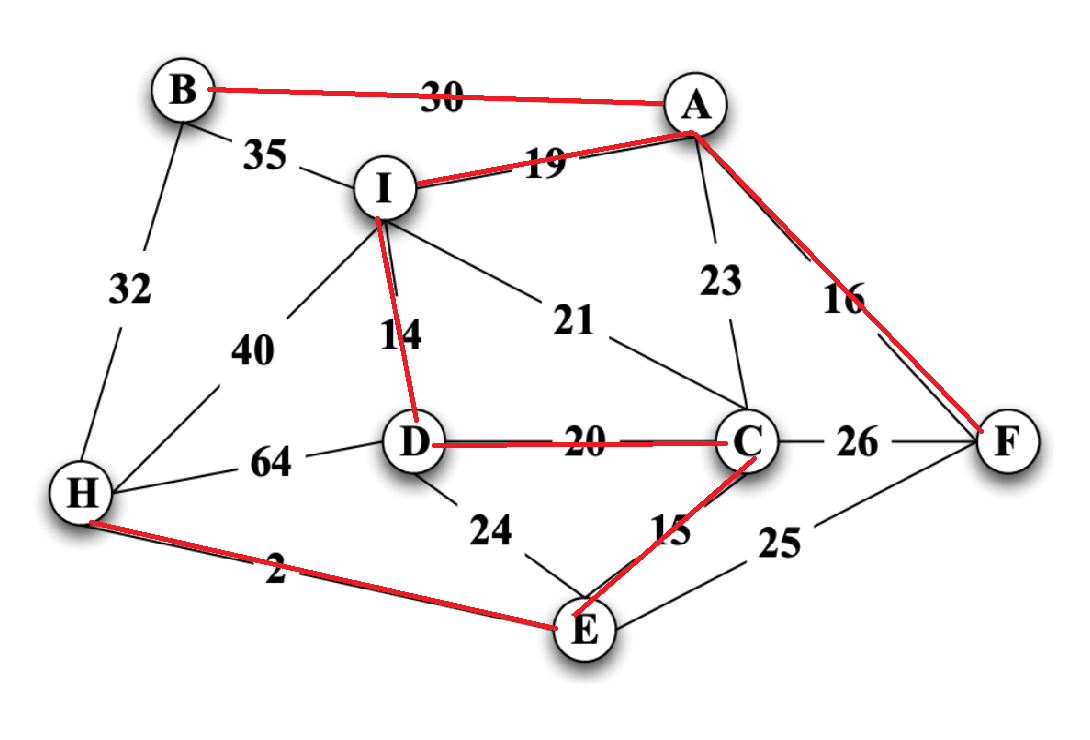

In [37]:
#程式#第五題
edges = [("A", "B", 30), ("A", "C",23),("A", "F", 16),("A", "I", 19),
      ("B", "I", 35), ("B", "H", 32),
      ("C", "D", 20), ("C", "E", 15),("C", "F", 26), ("C", "I", 21),
      ("D", "E", 64), ("D", "H", 64), ("D", "I", 14), ("E", "F", 25), ("E", "H", 2),
      ("H", "I", 40)] #把所有有連結到的邊跟邊長存在此陣列中
vertices=list('ABCDEFHI') #用來存節點名稱
edges.sort(key=lambda x:x[2]) #先把邊根據邊長(也就是x[2])由小到大進行排列，方便後續尋找最小邊
ori_trees=dict()
for i in vertices:
    ori_trees[i]=i

def find_node(x):   #找節點
    if ori_trees[x]!=x:
        ori_trees[x]=find_node(ori_trees[x])
    return ori_trees[x]

mst=[]

n=len(vertices)-1 #需要循環n次(節點數量-1)

for edge in edges:
    v1,v2,_=edge
    if find_node(v1)!=find_node(v2):
        ori_trees[find_node(v2)]=find_node(v1)
        mst.append(edge)
        print('添加'+str(8-n)+'條邊後：')
        n-=1
        #print(ori_trees)
        print(mst)
        if n==0:
            break

添加1條邊後：
[('E', 'H', 2)]
添加2條邊後：
[('E', 'H', 2), ('D', 'I', 14)]
添加3條邊後：
[('E', 'H', 2), ('D', 'I', 14), ('C', 'E', 15)]
添加4條邊後：
[('E', 'H', 2), ('D', 'I', 14), ('C', 'E', 15), ('A', 'F', 16)]
添加5條邊後：
[('E', 'H', 2), ('D', 'I', 14), ('C', 'E', 15), ('A', 'F', 16), ('A', 'I', 19)]
添加6條邊後：
[('E', 'H', 2), ('D', 'I', 14), ('C', 'E', 15), ('A', 'F', 16), ('A', 'I', 19), ('C', 'D', 20)]
添加7條邊後：
[('E', 'H', 2), ('D', 'I', 14), ('C', 'E', 15), ('A', 'F', 16), ('A', 'I', 19), ('C', 'D', 20), ('A', 'B', 30)]


下面這個是一開始試的解法，用Prim演算法去算出最小生成樹，算出來的答案跟上面那個Kruskal演算法是一樣的，但是我沒有完全看懂Prim演算法的程式碼的邏輯，不確定為何是從AB(30)這條邊開始，接下來卻接到沒有跟A或B連接在一起的DC(20)的這個部分。

In [41]:
#程式#第五題
class Graph():

    def __init__(self, vertices):   #初始化時先建立好矩陣
        self.V = vertices
        self.graph = [[0 for column in range(vertices)] 
                      for row in range(vertices)]

    # 使用parent[]來印出MST
    def printMST(self, parent):   #將找到的最小邊印出來
        print ("Edge \tWeight")
        #將每個點characters[i]與父節點characters[parent[i]]的邊印出(不列印根節點)
        for i in range(1,self.V):
            print (characters[parent[i]],"-",characters[i],"\t",self.graph[i][ parent[i] ])
    
    # 在非MST集合中選擇具有最小key值的節點
    def minKey(self, key, mstSet):
        min = float("inf")
        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
            #False代表是非MST集合中的節點，然後就是普通的尋找最小的操作
                min = key[v]
                min_index = v

        return min_index

    # 主函式，用來構造MST
    def primMST(self):
        #每個節點分配一個key值，在cut圖中用來挑選最小權值的那條邊，初始為無窮大
        key = [float("inf")] * self.V
        parent = [None] * self.V # 陣列用來記錄每個節點的父節點
        key[0] = 0   # 挑選key為0的節點(也就是本圖中的A)作為選擇的起點
        mstSet = [False] * self.V#記錄每個節點是否被加入到了MST集合中

        parent[0] = -1  # 第一個節點作為樹的根節點

        for cout in range(self.V):

            # 從非MST集合中挑選最小距離的節點
            u = self.minKey(key, mstSet)

            # 把挑選到的節點放到MST集合中去
            mstSet[u] = True

            # 更新被挑選節點的鄰接點的距離，只有當新距離比當前距離要小，且這個鄰接點在非MST集合中
            for v in range(self.V):
                # self.graph[u][v] > 0代表v是u的鄰接點
                # mstSet[v] == False代表當前節點還沒有加入到MST中
                # key[v] > self.graph[u][v]只有新距離比當前記錄距離要小時更新
                # 兩種情況，一是key[v]為無窮，肯定更新；二是key[v]為常數，但新距離更小
                if (self.graph[u][v] > 0) and (mstSet[v] == False) and (key[v] > self.graph[u][v]):
                        key[v] = self.graph[u][v]#更新距離
                        parent[v] = u#更新父節點

        self.printMST(parent)



characters = ['A', 'B', 'C', 'D', 'E', 'F', 'H', 'I']
g  = Graph(8) #A B C D E F H I
g.graph = [ [0, 30, 23, 0, 0, 16, 0, 19],
        [30, 0, 0, 0, 0, 0, 32, 35],
        [23, 0, 0, 20, 15, 26, 0, 21],
        [0, 0, 20, 0, 24, 0, 64, 14],
        [0, 0, 15, 24, 0, 25, 2, 0],
        [16, 0, 26, 0, 25, 0, 0, 0],
        [0, 32, 0, 64, 2, 0, 0, 40],
        [19, 35, 21, 14, 0, 0, 40, 0]
        
       ]
#圖的表示用鄰接矩陣，根據矩陣元素的索引判斷是哪條邊
#根據矩陣元素判斷該邊是否有邊，不為0代表有邊
print("使用Prim最小生成數演算法可以依序得出以下路徑：")
g.primMST();

使用Prim最小生成數演算法可以依序得出以下路徑：
Edge 	Weight
A - B 	 30
D - C 	 20
I - D 	 14
C - E 	 15
A - F 	 16
E - H 	 2
A - I 	 19
